In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['exam1','exam2','Y'])
data.head()


,exam1,exam2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [4]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)

In [5]:
data.insert(0,'b',1)
col = data.shape[1]
X = data.iloc[:,:col-1].values
Y = data.iloc[:,-1].values
# Y = np.array(Y)
# X = np.array(X)

w = np.zeros(3)
print(X)
print(np.array(Y))
positive = data[data['Y'].isin([1])]
negative = data[data['Y'].isin([0])]

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [6]:
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y))

In [7]:
result = minimize(fun=cost,x0=np.array(w),args=(X,np.array(Y)),method='TNC',jac=gradient)
result

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 0.20349770158947475
       x: [-2.516e+01  2.062e-01  2.015e-01]
     nit: 17
     jac: [ 9.288e-09  1.139e-07  4.840e-07]
    nfev: 36

In [8]:
cost(result.x,X,Y)


0.20349770158947475

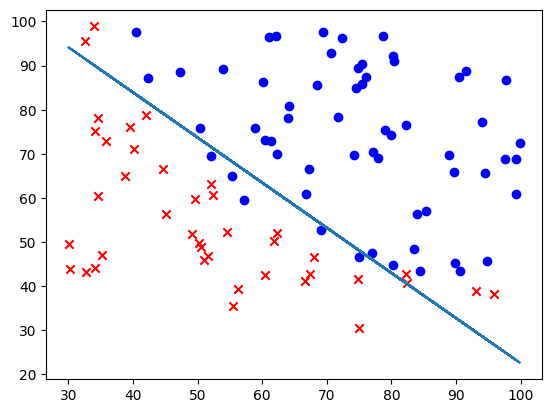

In [9]:
x2 = (-result.x[0] - result.x[1] * X[:,1] ) / result.x[2]
plt.plot(X[:,1],x2)
plt.scatter(positive['exam1'],positive['exam2'],c='b',marker='o')
plt.scatter(negative['exam1'],negative['exam2'],c='r',marker='x')
plt.show()

In [10]:
def expand_array(arr):
    return np.array(np.matrix(np.ones(arr.shape[0])).T@np.matrix(arr))

In [24]:
def gradient_check(theta,epsilon,X,Y):
    m = len(theta)
    theta_change = expand_array(theta)
    epsilon_matrix = np.identity(m) * epsilon
    plus_matrix = theta_change + epsilon_matrix
    mins_matrix = theta_change - epsilon_matrix
    approx_grad = []
    for i in range(m):
        approx_grad.append((cost(plus_matrix[i],X,Y) - cost(mins_matrix[i],X,Y)) / (2 * epsilon))
    approx_grad = np.array(approx_grad)
    analize_grad = gradient(theta,X,Y)
    diff = np.linalg.norm(approx_grad - analize_grad) / np.linalg.norm(approx_grad + analize_grad)
    print(diff)    

In [25]:
theta = np.array(w)
gradient_check(theta,0.1,X,Y)

2.634725691307838e-15
